In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importacion y observacion del Set de Datos

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial/segundo año/primer semestre/aprendizaje automatico/Parcial 2/data Titanic/Copia de Copia de Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Veo cuantos datos nulos tengo en el DataFrame y en que columnas
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Elimino las columnas que veo que no me serviran, en este caso serán el nombre del pasajero y su Id
df=df.drop(['Name','PassengerId','Cabin'],axis=1)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


#### Convertir Tiket en valores numericos

In [ ]:
#Paso los valores de Tiket a str, ya que hay datos que no son numeros
df['Ticket'] = list(map(str, df['Ticket']))
#Obtengo de los elementos de Tiket, los ultimos 4 digitos
df['Ticket']= [i[-4:] for i in df['Ticket']]
#Reemplazo los valores que son solo letras por valores unicos
df['Ticket'] = df['Ticket'].replace({ "LINE": 1010, "P. 3":2112})
#Paso los datos de la variable Tiket a numericos
df['Ticket'] = list(map(int, df['Ticket']))

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,1171,7.2500,S
1,1,1,female,38.0,1,0,7599,71.2833,C
2,1,3,female,26.0,0,0,1282,7.9250,S
3,1,1,female,35.0,1,0,3803,53.1000,S
4,0,3,male,35.0,0,0,3450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,1536,13.0000,S
887,1,1,female,19.0,0,0,2053,30.0000,S
888,0,3,female,NaN,1,2,6607,23.4500,S
889,1,1,male,26.0,0,0,1369,30.0000,C


#### Creacion de columna familia

In [ ]:
#La acolumna familia es la suma de la variable SibSp con Parch
df['Familia']=df['SibSp']+df['Parch']
#Eliminacion de las columnas usadas
df=df.drop(['SibSp','Parch'],axis=1)

### Embarked

In [ ]:
#Eliminación de los datos nulos de la columna Embarked, se realiza para que no de error el proceso de OneHotEncoder
df = df.dropna(subset=["Embarked"])

#### Genero rangos de Edad para Age

In [ ]:
#Rango de edad que quiero que tenga mis datos
rango = [-1, 18, 24, 30, 36, 48, 100]
#Nombre de los rangos
nom = [1, 2, 3, 4, 5, 6]
#Con pd.cut reemplazo las edades por los rangos a los que corresponde
df['Rango_Edad'] = pd.cut(df['Age'], rango, labels = nom)
#Paso el tipo de datos de Rango_Edad a  tipo numerico
df["Rango_Edad"] = pd.to_numeric(df["Rango_Edad"])
#Elimino mi columna Age 
df=df.drop(['Age'],axis=1)

#### Genero Rangos de precio para Fare

In [ ]:
#Rango de precio que quiero que tenga mis datos
bins = [-1, 8, 16, 24, 50, 600]
#Nombre de los rangos
names = [1, 2, 3, 4, 5]
#Con pd.cut reemplazo los precios por los rangos a los que corresponde
df['Rango_Precio'] = pd.cut(df['Fare'], bins, labels = names)
#Paso el tipo de datos de Rango_Edad a  tipo numerico
df["Rango_Precio"] = pd.to_numeric(df["Rango_Precio"])
#Elimino mi columna Fare
df=df.drop(['Fare'],axis=1)

### Completado de faltantes con KNN imputer

KNN solo puede imputar variables numericas, asi que primero pasamos las variables categoricas a numericas, pero conservando los datos nulos

In [ ]:
from sklearn.model_selection import train_test_split
#Separo las variables del target
x = df.drop(['Survived'],axis=1)
y = df['Survived']
#Genero mi division en train, test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=123)

#### Genero variables Dummy con OneHotEncoder para genero y envarcación

Eleccion de OneHotEncoder en vez de OrdinalEncoder porque las variables a transformar no tienen valor nominal

In [ ]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
#Lista de valores unicos en Sex
Genero=['male','female']
#Lista de valores unicos en Embarked
Embarcacion= ['C', 'Q', 'S']
#Genero tuplas con los elementos (nombre,instruccion,columna)
tDummy1= ('Genero',OneHotEncoder(categories=[Genero]),['Sex'])
tDummy2= ('Embarcacion',OneHotEncoder(categories=[Embarcacion]),['Embarked'])

In [ ]:
#Genero el objeto ColumnTransformer y le paso mi lista de tuplas
transformador_columnas_dummy5 = ColumnTransformer(transformers=[tDummy1,tDummy2],remainder='passthrough')
#Entreno a mi transformador con mi x_train
transformador_columnas_dummy5.fit(train_x)
#Aplico mi transformador en mi x_train y x_test
X_train_dummy5=transformador_columnas_dummy5.transform(train_x)
X_test_dummy5=transformador_columnas_dummy5.transform(test_x)
#Obtengo el nombre de las columnas de mi transformador
columnas=transformador_columnas_dummy5.get_feature_names()
#Genero 2 DataFrames con los datos de train y test correspondiente, pasandole el nombre de las columnas de mi transformador.
#Estos DataFrames son mis nuevos X_Train e X_Test
dfXtrain_Dummy=pd.DataFrame(X_train_dummy5, columns=columnas)
dfXtest_Dummy=pd.DataFrame(X_test_dummy5, columns=columnas)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
dfXtrain_Dummy

,Genero__x0_male,Genero__x0_female,Embarcacion__x0_C,Embarcacion__x0_Q,Embarcacion__x0_S,Pclass,Ticket,Familia,Rango_Edad,Rango_Precio
0,1.0,0.0,0.0,0.0,1.0,3.0,1440.0,0.0,6.0,2.0
1,0.0,1.0,0.0,1.0,0.0,3.0,7226.0,2.0,NaN,3.0
2,1.0,0.0,0.0,1.0,0.0,3.0,5097.0,0.0,4.0,1.0
3,1.0,0.0,0.0,0.0,1.0,3.0,3540.0,0.0,1.0,2.0
4,1.0,0.0,0.0,0.0,1.0,3.0,5082.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...
706,1.0,0.0,0.0,0.0,1.0,2.0,4367.0,1.0,4.0,4.0
707,0.0,1.0,0.0,0.0,1.0,2.0,8738.0,2.0,2.0,4.0
708,0.0,1.0,0.0,0.0,1.0,1.0,3789.0,1.0,4.0,5.0
709,0.0,1.0,1.0,0.0,0.0,1.0,813.0,1.0,6.0,5.0


###Completo los datos con KNN imputer

Ahora que mis variables son numericas, puedo utilizar KNNImputer

In [ ]:
from sklearn.impute import KNNImputer
#Obtengo los nombres de las columnas 
cols_num=dfXtrain_Dummy.columns
#Genero mi imputador de datos para valores nulos np.nan para 10 vecinos
KNN_imputer = KNNImputer(missing_values=np.nan,n_neighbors=10)
#Entreno a mi imputador con x_train
KNN_imputer.fit(dfXtrain_Dummy)
#Aplico mi imputador en x_train y x_test
Transformado_Train_x = KNN_imputer.transform(dfXtrain_Dummy)
Transformado_Test_x = KNN_imputer.transform(dfXtest_Dummy)
#Genero una lista con el nombre de mis columnas
cols_orden=cols_num.tolist()

In [ ]:
#Genero 2 DataFrames con los datos de train y test correspondiente, pasandole el nombre de las columnas de mi Imputador.
#Estos DataFrames son mis nuevos X_Train e X_Test
df_completo_train_x = pd.DataFrame(Transformado_Train_x,columns=cols_orden).round()
df_completo_test_x  = pd.DataFrame(Transformado_Test_x,columns=cols_orden).round()

In [ ]:
df_completo_test_x

,Genero__x0_male,Genero__x0_female,Embarcacion__x0_C,Embarcacion__x0_Q,Embarcacion__x0_S,Pclass,Ticket,Familia,Rango_Edad,Rango_Precio
0,1.0,0.0,0.0,0.0,1.0,3.0,1280.0,0.0,2.0,1.0
1,1.0,0.0,0.0,1.0,0.0,3.0,7232.0,0.0,5.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,7453.0,1.0,6.0,5.0
3,1.0,0.0,0.0,1.0,0.0,3.0,2652.0,5.0,1.0,4.0
4,1.0,0.0,0.0,0.0,1.0,2.0,4068.0,0.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.0,0.0,0.0,1.0,1.0,7590.0,0.0,4.0,5.0
174,0.0,1.0,1.0,0.0,0.0,2.0,1748.0,0.0,1.0,2.0
175,1.0,0.0,0.0,0.0,1.0,1.0,3784.0,0.0,5.0,4.0
176,0.0,1.0,0.0,0.0,1.0,1.0,3502.0,1.0,6.0,5.0


#### Normalizo mis datos entre valores de 0 y 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
#Genero tupla con los elementos (nombre,instruccion,columna)
t_norm_Tiket=("Ticket",MinMaxScaler(feature_range=(0, 1)),['Ticket'])
t_norm_Pclass = ("Clase",MinMaxScaler(feature_range=(0, 1)),['Pclass'])
t_norm_Flia = ("Flia",MinMaxScaler(feature_range=(0, 1)),['Familia'])
t_norm_Edad = ("Edad",MinMaxScaler(feature_range=(0, 1)),['Rango_Edad'])
t_norm_Precio = ("Precio",MinMaxScaler(feature_range=(0, 1)),['Rango_Precio'])
#Genero el objeto ColumnTransformer y le paso mi lista de tuplas
transformador_columnas= ColumnTransformer(transformers=[t_norm_Tiket,t_norm_Pclass,t_norm_Flia,t_norm_Edad,t_norm_Precio],remainder='passthrough')
#Entreno a mi transformador con mi x_train
transformador_columnas.fit(df_completo_train_x)
#Aplico mi transformador en mi x_train y x_test
X_Train_NORMALIZADO= transformador_columnas.transform(df_completo_train_x)
X_Test_NORMALIZADO= transformador_columnas.transform(df_completo_test_x)

In [ ]:
#Genero 2 DataFrames con los datos de train y test correspondiente, sin pasarle el nombre de las columnas ya que de aquí ingresarán a 
#los modelos.
#Estos DataFrames son mis nuevos X_Train e X_Test
Df_train_x_terminado = pd.DataFrame(X_Train_NORMALIZADO)
Df_test_x_terminado = pd.DataFrame(X_Test_NORMALIZADO)

### ultima visualizacion de datos

Antes de ingresar mis datos a los Modelos, observaré si tengo datos nulos y si se han normalizado correctamente 

In [ ]:
Df_train_x_terminado

,0,1,2,3,4,5,6,7,8,9
0,0.141912,1.0,0.0,1.0,0.25,1.0,0.0,0.0,0.0,1.0
1,0.722194,1.0,0.2,0.4,0.50,0.0,1.0,0.0,1.0,0.0
2,0.508675,1.0,0.0,0.6,0.00,1.0,0.0,0.0,1.0,0.0
3,0.352522,1.0,0.0,0.0,0.25,1.0,0.0,0.0,0.0,1.0
4,0.507171,1.0,0.0,0.4,0.00,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
706,0.435463,0.5,0.1,0.6,0.75,1.0,0.0,0.0,0.0,1.0
707,0.873834,0.5,0.2,0.2,0.75,0.0,1.0,0.0,0.0,1.0
708,0.377495,0.0,0.1,0.6,1.00,0.0,1.0,0.0,0.0,1.0
709,0.079029,0.0,0.1,1.0,1.00,0.0,1.0,1.0,0.0,0.0


In [ ]:
Df_test_x_terminado

,0,1,2,3,4,5,6,7,8,9
0,0.125865,1.0,0.0,0.2,0.00,1.0,0.0,0.0,0.0,1.0
1,0.722796,1.0,0.0,0.8,0.00,1.0,0.0,0.0,1.0,0.0
2,0.744960,0.0,0.1,1.0,1.00,1.0,0.0,1.0,0.0,0.0
3,0.263464,1.0,0.5,0.0,0.75,1.0,0.0,0.0,1.0,0.0
4,0.405476,0.5,0.0,0.4,0.25,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
173,0.758700,0.0,0.0,0.6,1.00,1.0,0.0,0.0,0.0,1.0
174,0.172801,0.5,0.0,0.0,0.25,0.0,1.0,1.0,0.0,0.0
175,0.376993,0.0,0.0,0.8,0.75,1.0,0.0,0.0,0.0,1.0
176,0.348711,0.0,0.1,1.0,1.00,0.0,1.0,0.0,0.0,1.0


In [ ]:
Df_train_x_terminado.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [ ]:
Df_test_x_terminado.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [ ]:
Df_train_x_terminado.describe()

,0,1,2,3,4,5,6,7,8,9
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,0.470931,0.664557,0.088889,0.435724,0.430731,0.646976,0.353024,0.175809,0.091421,0.732771
std,0.297838,0.413244,0.160993,0.298759,0.371808,0.478247,0.478247,0.380925,0.288409,0.442825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210811,0.500000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.425033,1.000000,0.000000,0.400000,0.250000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.747117,1.000000,0.100000,0.600000,0.750000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Df_test_x_terminado.describe()

,0,1,2,3,4,5,6,7,8,9
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.466287,0.620787,0.097753,0.466292,0.456461,0.657303,0.342697,0.241573,0.067416,0.691011
std,0.286040,0.432788,0.163629,0.322926,0.371856,0.475950,0.475950,0.429244,0.251448,0.463380
min,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230443,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.377946,1.000000,0.000000,0.400000,0.375000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.746239,1.000000,0.100000,0.800000,0.750000,1.000000,1.000000,0.000000,0.000000,1.000000
max,0.997593,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Empiezo con los modelos

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Genero mis validations 
val_train_x,val_test_x,val_train_y,val_test_y = train_test_split(Df_train_x_terminado ,train_y , test_size=0.2 ,random_state=123)

#### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#Lista de profundidad del Arbol
prof = np.arange(5,15,1)
#Lista de valores de Criterion
crit = ['gini','entropy']
#Lista de n_estimaciones
esti = np.arange(10,20,1)
max_features=['sqrt','log2',None]
class_weight=['balanced','balanced_subsample']
#Genero un DataFrame para guardar los datos de cada Accuracy con las combinaciones de hiperparametros para encontrar el mayor Accuracy
df_rf = pd.DataFrame(columns=['Accuracy','Max_Prof','Criterion','n_Estimators'])
for i in prof:
    for j in crit:
        for k in esti:
          for x in max_features:
            for m in class_weight:
              #Genero mi modelo Random Forest pasandoe los hiperparametros
              rf = RandomForestClassifier(max_depth=i, criterion = j, n_estimators= k, random_state=123,max_features=x,class_weight=m)
              #Entreno al modelo con los val_train
              rf.fit(val_train_x, val_train_y)
              #Saco los valores predecidos para val_x_test
              y_pred_rf = rf.predict(val_test_x)
              #Genero el Accuracy comparando mi y_predict con mi val_test_y
              acc_rf = accuracy_score(val_test_y, y_pred_rf)
              #Guardo los valores en el df
              df_rf = df_rf.append({'Accuracy': acc_rf,'Max_Prof': i,'Criterion': j,'n_Estimators': k,'max_features':x,'class_weight':m}, ignore_index=True)
df_rf.sort_values(by=['Accuracy','Max_Prof'], ascending=False)

,Accuracy,Max_Prof,Criterion,n_Estimators,class_weight,max_features
445,0.888112,8,entropy,14,balanced_subsample,sqrt
447,0.888112,8,entropy,14,balanced_subsample,log2
451,0.888112,8,entropy,15,balanced_subsample,sqrt
453,0.888112,8,entropy,15,balanced_subsample,log2
421,0.881119,8,entropy,10,balanced_subsample,sqrt
...,...,...,...,...,...,...
33,0.818182,5,gini,15,balanced_subsample,log2
1091,0.811189,14,gini,11,balanced_subsample,None
731,0.811189,11,gini,11,balanced_subsample,None
900,0.804196,12,entropy,10,balanced,sqrt


Viendo si tengo underfiting o overfiting

In [ ]:
df_append = Df_train_x_terminado.append(Df_test_x_terminado, ignore_index=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [ ]:
random = RandomForestClassifier(max_depth=9, criterion = 'gini', n_estimators= 22, random_state=123)
x_Fit= random.fit(Df_train_x_terminado,train_y)
tamanos_train=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
curvas_aprendizaje3=learning_curve(random, Df_train_x_terminado, train_y, 
                                  train_sizes=tamanos_train, 
                                  cv=5,
                                  scoring='neg_root_mean_squared_error',
                                  shuffle=True)
train_scores_en_cada_fold3=-1*curvas_aprendizaje3[1] 
train_scores3=np.mean(train_scores_en_cada_fold3, axis=1)

test_scores_en_cada_fold3=-1*curvas_aprendizaje3[2] 
test_scores3=np.mean(test_scores_en_cada_fold3, axis=1)
cantidad_observaciones=curvas_aprendizaje3[0]

df_learning_curves3=pd.DataFrame()
df_learning_curves3['cantidad_observaciones']=cantidad_observaciones
df_learning_curves3['train_RMSE']=train_scores3
df_learning_curves3['test_RMSE']=test_scores3
    

df_learning_curves3

,cantidad_observaciones,train_RMSE,test_RMSE
0,56,0.053452,0.496363
1,113,0.083051,0.490212
2,170,0.126977,0.458543
3,227,0.178016,0.452743
4,284,0.183653,0.453429
5,340,0.205670,0.448861
6,397,0.220576,0.453834
7,454,0.225825,0.441884
8,511,0.238591,0.427103
9,568,0.241493,0.426087


Text(0, 0.5, 'Error')

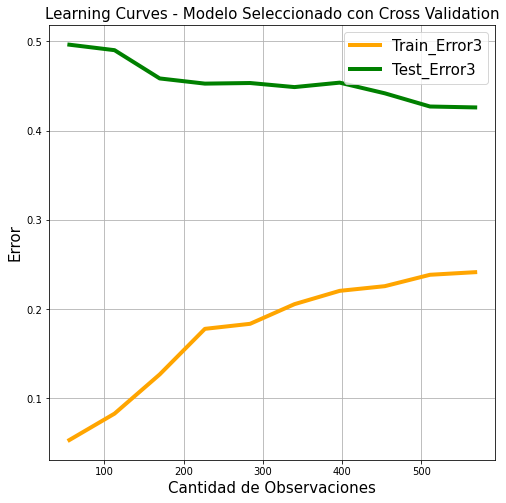

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plt.title("Learning Curves - Modelo Seleccionado con Cross Validation", size=15)

axes.plot(df_learning_curves3['cantidad_observaciones'],df_learning_curves3['train_RMSE'], "orange", linewidth=4, label="Train_Error3")
axes.plot(df_learning_curves3['cantidad_observaciones'],df_learning_curves3['test_RMSE'], "green", linewidth=4, label="Test_Error3")

axes.grid(True)
axes.legend(loc="upper right",fontsize=15)
axes.set_xlabel('Cantidad de Observaciones', size=15)
axes.set_ylabel('Error', size=15)

Tengo underfiting

#### GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#Lista de profundidad del Arbol
prof = np.arange(1,10,1)
#Lista de n_estimaciones
esti = np.arange(20,30,1)
#Lista de valores de Loss
loss = ['deviance','exponential']
#Lista de valores de Criterion
criterion = ['friedman_mse','squared_error']
#Genero un DataFrame para guardar los datos de cada Accuracy con las combinaciones de hiperparametros para encontrar el mayor Accuracy
df_gb = pd.DataFrame(columns=['Accuracy','Max_Prof','n_Estimators'])
for i in prof:
    for k in esti:
      for x in loss:
        for n in criterion:
            #Genero mi modelo GradientBoostingClassifier pasandoe los hiperparametros
            gb = GradientBoostingClassifier(max_depth=i, n_estimators= k, random_state = 123,loss=x,criterion=n)
            #Entreno al modelo con los val_train
            gb.fit(val_train_x, val_train_y)
            #Saco los valores predecidos para val_x_test
            y_pred_gb = gb.predict(val_test_x)
            #Genero el Accuracy comparando mi y_predict con mi val_test_y
            acc_gb = accuracy_score(val_test_y, y_pred_gb)
            #Guardo los valores en el df
            df_gb = df_gb.append({'Accuracy': acc_gb,'Max_Prof': i,'n_Estimators': k, 'loss':x,'criterion':n}, ignore_index=True)
df_gb.nlargest(10,['Accuracy'])

,Accuracy,Max_Prof,n_Estimators,criterion,loss
32,0.881119,1,28,friedman_mse,deviance
33,0.881119,1,28,squared_error,deviance
36,0.881119,1,29,friedman_mse,deviance
37,0.881119,1,29,squared_error,deviance
38,0.881119,1,29,friedman_mse,exponential
39,0.881119,1,29,squared_error,exponential
210,0.881119,6,22,friedman_mse,exponential
211,0.881119,6,22,squared_error,exponential
214,0.881119,6,23,friedman_mse,exponential
215,0.881119,6,23,squared_error,exponential


#### XGBoost

In [ ]:
from xgboost import XGBClassifier
#Lista de valores de Loss
loss= ['log_loss','exponential']
#Lista de valores de Criterion
criterion= ['friedman_mse','squared_error']
#Lista de valores de learning_rate
learning_rate = [0.094,0.095,0.096]
#Lista de profundidad del Arbol
max_depth = np.arange(1,15,1)
#Lista de n_estimaciones
n_estimators = np.arange(65,75,1)
#Lista de valores de subsample
subsample = [0.75,0.76,0.77]
#Lista de valores de colsample_bytree
colsample_bytree = [0.7,0.71,0.72]
#Genero un DataFrame para guardar los datos de cada Accuracy con las combinaciones de hiperparametros para encontrar el mayor Accuracy
df_xgbo = pd.DataFrame(columns=['Accuracy','Max_Prof','n_Estimators','Learning_Rate','Subsample','Colsample_bytree'])
for i in max_depth:
    for j in n_estimators:
        for k in learning_rate:
            for l in subsample:
                for m in colsample_bytree:
                  for n in loss:
                    for x in criterion:
                      #Genero mi modelo XGBClassifier pasandoe los hiperparametros
                      xgbo = XGBClassifier(max_depth = i, n_estimators = j, learning_rate = k, subsample = l, colsample_bytree = m, nthread = -1, 
                      objective = "binary:logistic", eval_metric = "logloss", use_label_encoder = False,loss=n,criterion=x)
                      #Entreno al modelo con los val_train
                      xgbo.fit(val_train_x, val_train_y)
                      #Saco los valores predecidos para val_x_test
                      y_pred_xgbo = xgbo.predict(val_test_x)
                      #Genero el Accuracy comparando mi y_predict con mi val_test_y
                      acc_xgbo = accuracy_score(val_test_y, y_pred_xgbo)
                      #Guardo los valores en el df
                      df_xgbo = df_xgbo.append({'Accuracy':acc_xgbo,'Max_Prof':i,'n_Estimators':j,'Learning_Rate':k, 'Subsample':l,'Colsample_bytree':m,'loss':n,'criterion':x}, ignore_index=True)
df_xgbo.nlargest(5,['Accuracy'])

,Accuracy,Max_Prof,n_Estimators,Learning_Rate,Subsample,Colsample_bytree,criterion,loss
5988,0.881119,6,70,0.095,0.76,0.70,friedman_mse,log_loss
5989,0.881119,6,70,0.095,0.76,0.70,squared_error,log_loss
5990,0.881119,6,70,0.095,0.76,0.70,friedman_mse,exponential
5991,0.881119,6,70,0.095,0.76,0.70,squared_error,exponential
5992,0.881119,6,70,0.095,0.76,0.71,friedman_mse,log_loss


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
#Genero un DataFrame para guardar los datos de cada Accuracy con las combinaciones de hiperparametros para encontrar el mayor Accuracy
dfKNN= pd.DataFrame(columns=['acc','n_neighbors','weights','algorithm','P'])
#Lista de valores de n_neighbors
n_range= np.arange(105,120,1)
#Lista de valores de Weights
varWeights=["uniform", "distance"]
#Lista de valores de Algorithm
varAlgorithm = ["auto", "ball_tree", "kd_tree", "brute"]
#Lista de valores de P
VarP= [1,2]
for n in n_range:
  for j in varWeights:
    for x in varAlgorithm:
      for m in VarP:
          #Genero mi modelo KNeighborsClassifier pasandoe los hiperparametros
          knn=KNeighborsClassifier(n_neighbors=n,weights=j, algorithm=x, p= m)
          #Entreno al modelo con los val_train
          knn.fit(val_train_x, val_train_y)
          #Saco los valores predecidos para val_x_test
          predknn_y=knn.predict(val_test_x)
          #Genero el Accuracy comparando mi y_predict con mi val_test_y
          acc= accuracy_score(val_test_y,predknn_y)
          #Guardo los valores en el df
          dfKNN=dfKNN.append({'acc':acc, 'n_neighbors':n,'weights':j,'algorithm':x,'P':m},ignore_index=True)
dfKNN.sort_values(by=['acc','n_neighbors'], ascending=False).head()

,acc,n_neighbors,weights,algorithm,P
121,0.881119,112,distance,auto,2
123,0.881119,112,distance,ball_tree,2
125,0.881119,112,distance,kd_tree,2
127,0.881119,112,distance,brute,2
105,0.881119,111,distance,auto,2


In [ ]:
knnFin=KNeighborsClassifier(n_neighbors=112,weights='distance', algorithm='auto', p= 2)
#Entreno al modelo con los val_train
knnFin.fit(Df_train_x_terminado, train_y)
#Saco los valores predecidos para val_x_test
predknn_yFin=knn.predict(Df_test_x_terminado)
#Genero el Accuracy comparando mi y_predict con mi val_test_y
accFin= accuracy_score(test_y,predknn_yFin)
accFin

0.8202247191011236

Arbol

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
#Genero un DataFrame para guardar los datos de cada Accuracy con las combinaciones de hiperparametros para encontrar el mayor Accuracy
dfarbol= pd.DataFrame(columns=['acc','Criterion','Splitter','Max_depth'])
#Lista de valores de Criterion
varCriterion= ['gini', 'entropy']
#Lista de valores de Splitter
varSplitter=['best', 'random']
#Lista de valores de Max_depth
varMax_depth = np.arange(1,10,1)
for n in varCriterion:
  for j in varSplitter:
      for x in varMax_depth:
        #Genero mi modelo DecisionTreeClassifier pasandoe los hiperparametros
        arbol = DecisionTreeClassifier(random_state=123, criterion=n, splitter = j, max_depth= x)
        #Entreno al modelo con los val_train
        arbol.fit(val_train_x, val_train_y)
        #Saco los valores predecidos para val_x_test
        y_pred=arbol.predict(val_test_x)
        #Genero el Accuracy comparando mi y_predict con mi val_test_y
        acc = accuracy_score(val_test_y,y_pred)
        #Guardo los valores en el df
        dfarbol=dfarbol.append({'acc':acc, 'Criterion':n,'Splitter':j,'Max_depth':x},ignore_index=True)
dfarbol.sort_values(by=['acc','Max_depth'], ascending=False).head()

,acc,Criterion,Splitter,Max_depth
0,0.867133,gini,best,1
9,0.867133,gini,random,1
18,0.867133,entropy,best,1
27,0.867133,entropy,random,1
7,0.860140,gini,best,8


### Mejor Modelo

RandomForest me dio el valor de Accuracy mas alto, entrenaré con los datos completos de Train y Test al modelo para ver cual me da un mejor Accuracy

RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfFin = RandomForestClassifier(max_depth=8, criterion = 'entropy', n_estimators= 14, random_state=123,max_features='sqrt',class_weight='balanced_subsample')
rfFin.fit(Df_train_x_terminado, train_y)
y_pred_rfFin = rfFin.predict(Df_test_x_terminado)
acc_rfFin = accuracy_score(test_y, y_pred_rfFin)
print('El Accuracy del modelo de RandomForest es igual a {}'.format(acc_rfFin.round(4)))

El Accuracy del modelo de RandomForest es igual a 0.8202


#### Conclusión:

El mejor modelo a usar es el de RandomForest